## K-Nearest Neighbors

Author: Thomas James Tiam-Lee

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Generate Synthetic Dataset

In [20]:
np.random.seed(1)
X1_zero = np.random.normal(loc=2.5, scale=0.5, size=10).reshape(-1, 1)
X2_zero = np.random.normal(loc=5, scale=0.25, size=10).reshape(-1, 1)
X1_one = np.random.normal(loc=4, scale=0.75, size=10).reshape(-1, 1)
X2_one = np.random.normal(loc=4.5, scale=0.5, size=10).reshape(-1, 1)
X_zero = np.concatenate((X1_zero, X2_zero), axis=1)
X_one = np.concatenate((X1_one, X2_one), axis=1)
X = np.concatenate((X_zero, X_one), axis=0)

y_zero = np.zeros(10)
y_ones = np.ones(10)
y = np.concatenate((y_zero, y_ones))


### Plot the Data

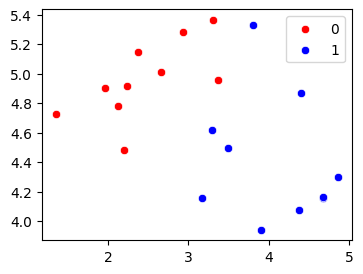

In [22]:
def plot(X, y):
  fig, ax = plt.subplots(1,1,figsize=(4,3))
  sns.scatterplot(x=X[y==0][:,0], y=X[y==0][:,1], color='red', label='0')
  sns.scatterplot(x=X[y==1][:,0], y=X[y==1][:,1], color='blue', label='1')
  return fig, ax
fig, ax = plot(X, y)

### Training the Model

In KNN, there is no training required because the model for KNN is the training data itself (it simply memorizes all the data points).

### Making a Prediction

Let's say we want to make a prediction for the following point:

In [27]:
y_test = np.array([[4, 4.2]])

<AxesSubplot:>

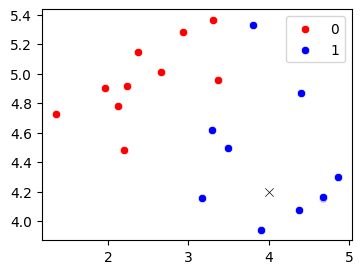

In [28]:
fig, ax = plot(X, y)
sns.scatterplot(x=y_test[:,0], y=y_test[:,1], color='black', marker='x', ax=ax)

Set the hyperparameter $k$.

In [29]:
k = 1

We need to find the $k$ closest neighbors to `y_test`. Therefore, we need to compute the distance between each point in the training data to `y_test`.

In [33]:
y_test

array([[4. , 4.2]])

In [40]:
distances = np.sqrt(np.power(X - y_test, 2).sum(axis=1))
distances

array([1.35335124, 1.82822347, 1.90513232, 2.15473089, 1.52084467,
       2.70226418, 0.98324021, 1.96816937, 1.56648802, 1.87988235,
       0.82673567, 0.86453629, 0.67759634, 0.39631177, 0.67658042,
       0.59093176, 0.27458583, 0.81647023, 1.14762526, 0.78005699])

We need to get the $k$ smallest distances, and their indices.

In [43]:
closest_neighbors = distances.argsort()[:k]
smallest_distances = distances[closest_neighbors]
closest_neighbors, smallest_distances

(array([16], dtype=int64), array([0.27458583]))

In [45]:
X[16]

array([3.90783233, 3.94134483])

We get the classes of the closest neighbors.

In [48]:
closest_neighbors_classes = y[closest_neighbors]
closest_neighbors_classes

array([1.])

We get the majority class.

In [51]:
classes, counts = np.unique(closest_neighbors_classes, return_counts=True)
classes[np.argmax(counts)]

1.0